# Importando bibliotecas (módulos)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn
from bitstring import BitArray
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Importanto os dados

In [2]:
# Os três arquivos .csv fornecidos foram carregados em um repositório público em nossa página do GitHub

# Nossa página: https://github.com/EPOS-Projetos-Aeroespaciais

# Repositório: https://github.com/EPOS-Projetos-Aeroespaciais/CubeDesign-2021-DataScience

teste = "https://raw.githubusercontent.com/EPOS-Projetos-Aeroespaciais/CubeDesign-2021-DataScience/main/DataSets/cubedesign_test.csv"
treino = "https://raw.githubusercontent.com/EPOS-Projetos-Aeroespaciais/CubeDesign-2021-DataScience/main/DataSets/cubedesign_train.csv"
sample = "https://raw.githubusercontent.com/EPOS-Projetos-Aeroespaciais/CubeDesign-2021-DataScience/main/DataSets/cubedesign_sample2.csv"

# função read_csv para "ler" o arquivo em .csv e transformá-lo em objeto dataframe

# DataFrame para dados de teste
df_teste = pd.read_csv(teste,decimal=",")

# DataFrame para dados de treino
df_treino = pd.read_csv(treino,decimal=",")

# DataFrame do sample fornecido
df_sample = pd.read_csv(sample)

# Análise Descritiva

In [3]:
# Primeiras linhas do dataset de treino

df_treino.head()

,et,obcflags,batt,curr,txforward2,txcurr,rxcurr,rxdoppler,rxrssi,txreflected,txforward,txtemp,txvoltage,antsA,antsB,localtime,boardtime
0,COESU,007d,8.286,0.067,75.526390,0,0.057,413,942,0.003824,0.005975,-0.322581,8.080645,100,100.0,2021-03-23 12:17:30,2020-12-10 07:22:26
1,COESU,007d,8.286,0.067,75.598090,0,0.058,412,952,0.003824,0.005975,0.000000,8.064516,100,100.0,2021-03-23 12:18:30,2020-12-10 07:23:26
2,COESU,007d,8.286,0.067,75.616015,0,0.057,413,953,0.003824,0.005975,0.322581,8.096774,100,100.0,2021-03-23 12:18:45,2020-12-10 07:23:41
3,COESU,007d,8.296,0.067,75.633940,0,0.058,411,949,0.003824,0.005975,0.322581,8.048387,100,100.0,2021-03-23 12:19:00,2020-12-10 07:23:56
4,COESU,007d,8.296,0.067,75.741490,0,0.058,412,947,0.003824,0.005975,1.290323,8.096774,100,100.0,2021-03-23 12:20:30,2020-12-10 07:25:26


In [4]:
# Observando algumas estatísticas de cada coluna

df_treino.describe()

,batt,curr,txforward2,txcurr,rxcurr,rxdoppler,rxrssi,txreflected,txforward,txtemp,txvoltage,antsB
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,509.0
mean,8.274849,0.091433,99.736530,24.209804,0.084159,432.419608,973.654902,233.696349,83.676048,9.535104,8.452467,100.0
std,0.152967,0.577164,2030.828370,546.734350,0.600433,483.087061,578.102868,5277.510920,1889.538250,159.445147,9.095823,0.0
min,8.166000,0.063000,0.000000,0.000000,0.000000,256.000000,768.000000,0.000000,0.000000,-50.000000,4.129032,100.0
25%,8.286000,0.063000,0.080065,0.000000,0.057000,411.000000,945.000000,0.003824,0.005975,0.000000,8.048387,100.0
50%,8.286000,0.067000,0.186420,0.000000,0.058000,412.000000,949.000000,0.003824,0.005975,3.064516,8.080645,100.0
75%,8.296000,0.067000,20.496640,0.000000,0.058000,414.000000,953.000000,0.003824,0.005975,5.725806,8.096774,100.0
max,11.569000,13.100000,45870.815900,12347.000000,13.617000,11319.000000,14000.000000,119182.981079,42671.787516,3600.645161,213.419355,100.0


## Tratamento dos dados


## Limpeza dos dados

In [5]:
# Verificando se temos dados nulos, sua quantidade e em quais colunas estão presentes

df_treino.isna().sum()

et               0
obcflags         0
batt             0
curr             0
txforward2       0
txcurr           0
rxcurr           0
rxdoppler        0
rxrssi           0
txreflected      0
txforward        0
txtemp           0
txvoltage        0
antsA            0
antsB            1
localtime        0
boardtime      389
dtype: int64

In [6]:
'''
Como boardtime possui muitos valores nulos não foi considerado uma boa opção remover as linhas onde estes falores são faltantes.
Entretando, se removeu valores faltantes de "antsB", a outra variável que possui valores nulos.
'''

df_treino = df_treino.dropna(subset = ['antsB'])

In [7]:
df_treino.isna().sum()

et               0
obcflags         0
batt             0
curr             0
txforward2       0
txcurr           0
rxcurr           0
rxdoppler        0
rxrssi           0
txreflected      0
txforward        0
txtemp           0
txvoltage        0
antsA            0
antsB            0
localtime        0
boardtime      388
dtype: int64

Observa-se que todos as variáveis possuem valores não nulos, com exceção de "boardtime" pelos motivos citados anteriormente.

## Tratando dados em HEX

### obcflags

In [8]:
# Convertendo os dados de hex para binário para que a análise possa ser feita

obc = pd.Series([BitArray(hex=x).bin for x in df_treino['obcflags']])

print(obc)

0      0000000001111101
1      0000000001111101
2      0000000001111101
3      0000000001111101
4      0000000001111101
             ...       
504    0000000001111101
505    0000000001111101
506    0000000001111101
507    0000000001111101
508    0000000001111101
Length: 509, dtype: object


In [9]:
# Contando quais são os arrays de bits únicos e sua frequência no dataset

obc.value_counts()

0000000001111101    509
dtype: int64

### antsA e antsB

In [10]:
antsA = pd.Series([BitArray(hex=x).bin for x in df_treino['antsA'].astype(int).astype(str)])

print(antsA)

0      000100000000
1      000100000000
2      000100000000
3      000100000000
4      000100000000
           ...     
504    000100000000
505    000100000000
506    000100000000
507    000100000000
508    000100000000
Length: 509, dtype: object


In [11]:
antsA.value_counts()

000100000000    509
dtype: int64

In [12]:
antsB = pd.Series([BitArray(hex=x).bin for x in df_treino['antsB'].astype(int).astype(str)])

print(antsB)

0      000100000000
1      000100000000
2      000100000000
3      000100000000
4      000100000000
           ...     
504    000100000000
505    000100000000
506    000100000000
507    000100000000
508    000100000000
Length: 509, dtype: object


In [13]:
antsB.value_counts()

000100000000    509
dtype: int64

## Explorando as features (variáveis)

In [14]:
# Identificando o tipo de dado contido em cada coluna 

df_treino.dtypes

et              object
obcflags        object
batt           float64
curr           float64
txforward2     float64
txcurr           int64
rxcurr         float64
rxdoppler        int64
rxrssi           int64
txreflected    float64
txforward      float64
txtemp         float64
txvoltage      float64
antsA           object
antsB          float64
localtime       object
boardtime       object
dtype: object

In [15]:
# Contando a frequência com que cada estação aparece no dataset

df_treino['et'].value_counts()

PV8DX     180
KB6LTY    149
EMMN       83
COESU      38
PY4ZBZ     35
PY5LF      24
Name: et, dtype: int64

### Observando correlação das variáveis

Text(0.5, 1.0, 'Correlação entre variáveis no dataset de Treino - antes do dia 27/03 \n')

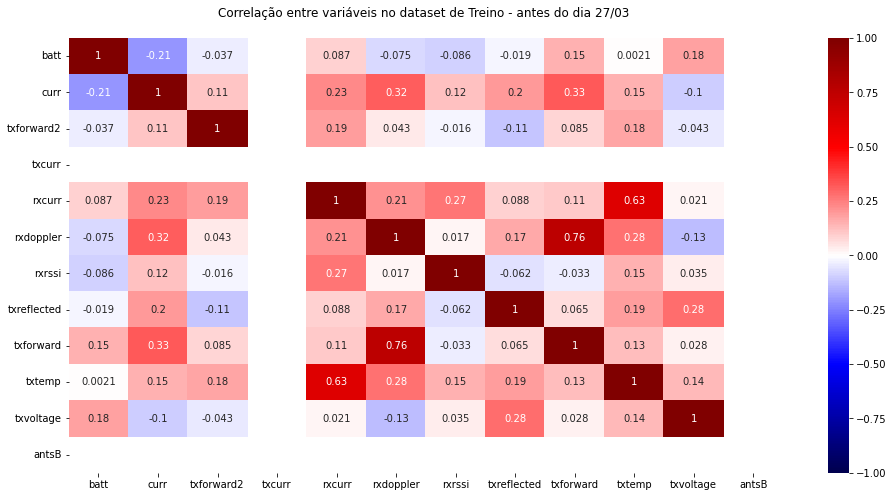

In [16]:
# Correlação entre variáveis antes de 27/03

plt.figure(figsize=(16,8))
sns.heatmap(df_treino[:48].corr(),
                      vmin=-1, vmax=1, annot=True,cmap='seismic')\
                      .set_title("Correlação entre variáveis no dataset de Treino - antes do dia 27/03 \n")

Text(0.5, 1.0, 'Correlação de txtemp no dataset de Treino - antes do dia 27/03 \n')

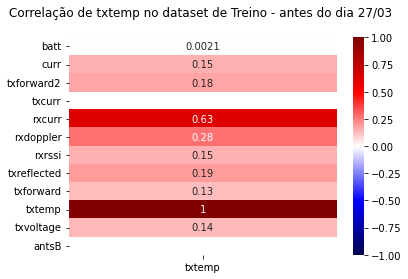

In [17]:
# Correlação das variáveis em relação à temperatua do dataset de treino antes de 27/03 

sns.heatmap(df_treino[:48].corr()[['txtemp']],
                      vmin=-1, vmax=1, annot=True, cmap='seismic').set_title("Correlação de txtemp no dataset de Treino - antes do dia 27/03 \n")

Text(0.5, 1.0, 'Correlação entre variáveis no dataset de Treino - após do dia 27/03 \n')

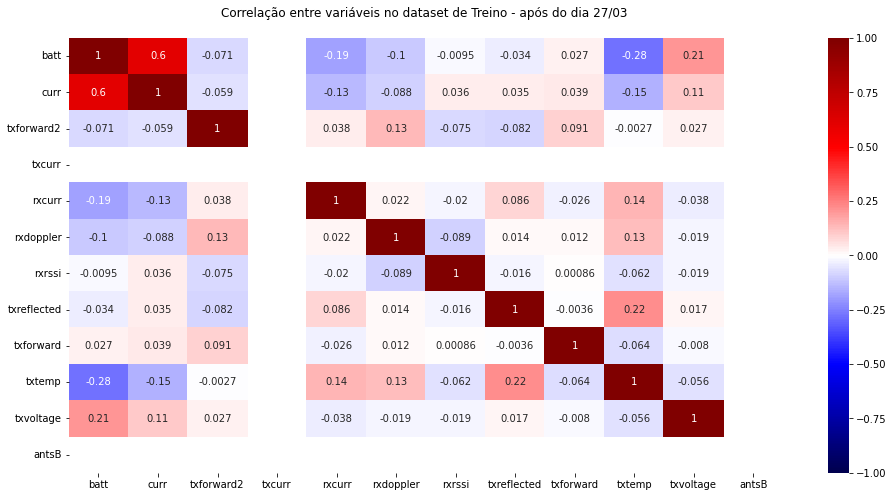

In [18]:
# Correlação de variávies após 27/03

plt.figure(figsize=(16,8))
sns.heatmap(df_treino[48:].corr(),
                      vmin=-1, vmax=1, annot=True,cmap='seismic')\
                      .set_title("Correlação entre variáveis no dataset de Treino - após do dia 27/03 \n")

Text(0.5, 1.0, 'Correlação de txtemp no dataset de Treino - após dia 27/03 \n')

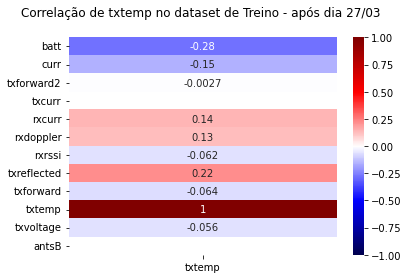

In [19]:
# Correlação das variáveis em relação à temperatua do dataset de treino após de 27/03 

sns.heatmap(df_treino[48:].corr()[['txtemp']],
                      vmin=-1, vmax=1, annot=True, cmap='seismic').set_title("Correlação de txtemp no dataset de Treino - após dia 27/03 \n")

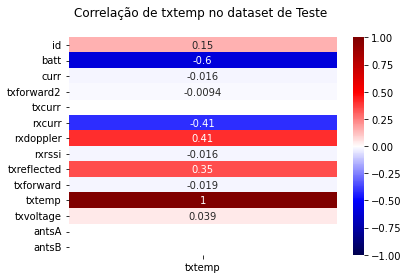

In [20]:
# Correlação das variáveis em relação à temperatua do dataset de teste

heatmap = sns.heatmap(df_teste.corr()[['txtemp']],
                      vmin=-1, vmax=1, annot=True, cmap='seismic').set_title("Correlação de txtemp no dataset de Teste \n")

# Análise Diagnóstica

Os seguintes gráficos são oriundos dos dados de treino e estão em função do nº de linhas(ou tempo, visto que cada linha representa um momento no tempo em ordem crescente )

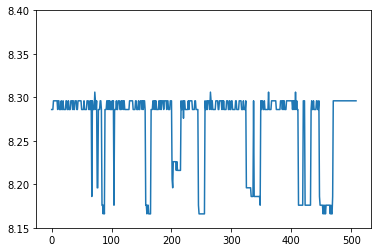

In [21]:
Linhas = range(0, len(df_treino.localtime))
plt.plot(Linhas , df_treino.batt)
plt.ylim(8.15, 8.4)
plt.show()

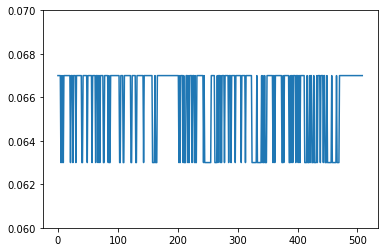

In [22]:
plt.plot(Linhas , df_treino.curr)
plt.ylim(0.06, 0.07)
plt.show()

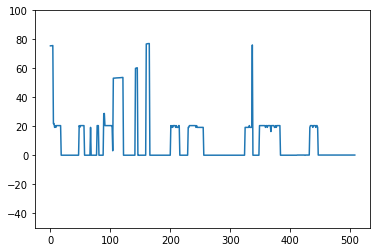

In [23]:
plt.plot(Linhas , df_treino.txforward2)
plt.ylim(-50, 100)
plt.show()

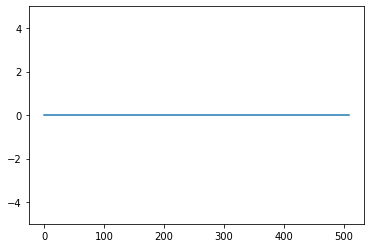

In [24]:
plt.plot(Linhas , df_treino.txcurr)
plt.ylim(-5, 5)
plt.show()

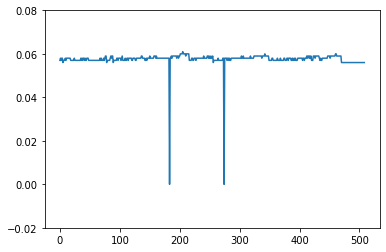

In [25]:
plt.plot(Linhas , df_treino.rxcurr)
plt.ylim(-0.02, 0.08)
plt.show()

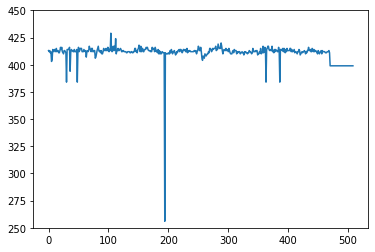

In [26]:
plt.plot(Linhas , df_treino.rxdoppler)
plt.ylim(250, 450)
plt.show()

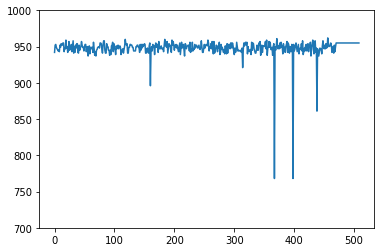

In [27]:
plt.plot(Linhas , df_treino.rxrssi)
plt.ylim(700, 1000)
plt.show()

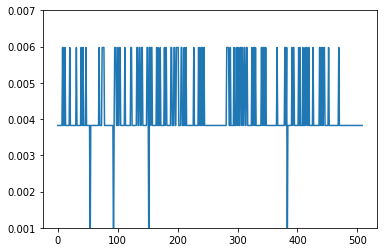

In [28]:
plt.plot(Linhas , df_treino.txreflected)
plt.ylim(0.001, 0.007)
plt.show()

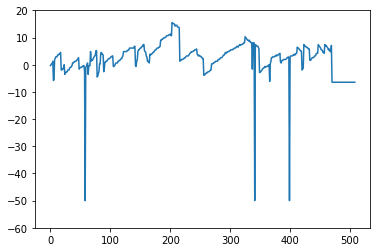

In [29]:
plt.plot(Linhas , df_treino.txtemp)
plt.ylim(-60, 20)
plt.show()

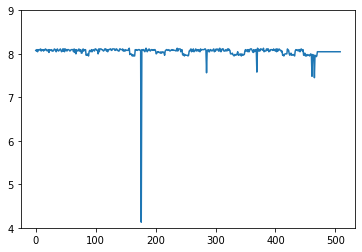

In [30]:
plt.plot(Linhas , df_treino.txvoltage)
plt.ylim(4, 9)
plt.show()

# Análise Preditiva

In [31]:
# Retirando variáveis que não parecem se correlacionar fortemente com a variável de interesse ou se mantém praticamente constantes no dataset
# Como txforward2 e txfoward se referem à mesma informação, txforward2 não foi selecionada

features = ["txcurr","antsA","antsB","obcflags","boardtime","localtime","txforward2"]

# Selecionando dados de treino

X_train = df_treino.drop(columns = features)

# Serão utilizadas as informações antes de 27/03 onde foi identificado o problema no dataset de treino

X_train = X_train[:48]

Y_train = df_treino['txtemp'] # A temperatura será nossa variável de interesse


Y_train = Y_train[:48]

# Selecionando dados de teste

X_test = df_teste.drop(columns = features)

X_test = X_test.drop(columns = ['id'])


In [32]:
# A variável "et" referente a estação terrena que recebeu o frame precisa ser convertida em valores numéricos para que o modelo possa utilizar essa informação

In [33]:
# Será feito um processamento de one-hot encoding para a variável "et" permitindo marcar qual estação está indentificada com valor 1, as demais serão marcadas com 0

X_train = pd.get_dummies(X_train, columns = ['et'])
X_test = pd.get_dummies(X_test, columns = ['et'])

In [34]:
# Tirando as estações que não estão presentes na porção do dataset de treino selecionada

X_test = X_test.drop(columns = ['et_EMMN','et_KB6LTY','et_PY5LF'])

In [35]:
# Criando o regressor utilizando o método Random Forest

regr = RandomForestRegressor(max_depth= 4, random_state=0)

# Ajustando o modelo pelos dados de treino selecionados

regr.fit(X_train, Y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [36]:
# Realizando a predição pelos dados de teste

y_pred = regr.predict(X_test)

In [37]:
# Tornando a predição em um dataframe e inserindo a coluna de Id

result = pd.DataFrame(y_pred,df_teste['id'],columns = ['Predicted'])
result

,Predicted
id,
1,-4.278594
2,-4.339885
3,-4.268917
4,-4.278594
5,-4.278594
...,...
127,4.202527
128,4.178817
129,4.211882


In [38]:
print('Erro médio em relação aos dados de teste: ', round(np.mean(abs(result['Predicted'] - X_test['txtemp'])), 2),'°C')

Erro médio em relação aos dados de teste:  2.13 °C


In [39]:
# Calculando o coeficiente de determinação levando em conta valores de temperatura fornecidos

r2_score(df_teste['txtemp'], y_pred)

0.6572490374864529

In [40]:
# Exportando os resultados em um arquivo .csv

result.to_csv("solution_table.csv", index=True)